# Lab 4: Divide and Conquer Algorithms

> Date: 11/08/2024
> Author: Adam Haile, Leigh Goetsch, Aiden Miller
> Class: CSC3310
>
> ### Learning Outcomes
>
> - Design an algorithm for a given computational problem statement
> - Justify the correctness of an algorithm
> - Perform asymptotic complexity analysis of the run time of an algorithm
> - Generate test cases for an algorithm
> - Correctly implement an algorithm from pseudocode
> - Design and execute benchmarks for an algorithm



## Proposed Solution - Quickselect Algorithm
The quickselect algorithm is similar to the quicksort algorith, but with modifications so that it instead returns the $k^{th}$ smallest value in lstay, rather than a sorted lstay.

In [11]:
import random

In [12]:
def partition(lst, low, high):
    pivot_index = random.randint(low, high)
    lst[pivot_index], lst[high] = lst[high], lst[pivot_index]
    pivot = lst[high]
    
    i = low
    for j in range(low, high):
        if lst[j] < pivot:
            lst[i], lst[j] = lst[j], lst[i]
            i += 1
    lst[i], lst[high] = lst[high], lst[i]
    return i

def select(lst, low, high, k_smallest):
    if low == high:
        return lst[low]
    
    pivot_index = partition(lst, low, high)
    
    if k_smallest == pivot_index:
        return lst[k_smallest]
    elif k_smallest < pivot_index:
        return select(lst, low, pivot_index - 1, k_smallest)
    else:
        return select(lst, pivot_index + 1, high, k_smallest)

def quickselect(lst, k):
    return select(lst, 0, len(lst) - 1, k - 1)

## Tests


In [13]:
def create_random_list(n, min=1, max=100):
    random.seed(42)
    return random.sample(range(min, max), n)
lst = create_random_list(10)
sorted_lst = sorted(lst)
print(lst)
print(sorted_lst)

[82, 15, 4, 95, 36, 32, 29, 18, 14, 87]
[4, 14, 15, 18, 29, 32, 36, 82, 87, 95]


In [14]:
# Test one (sunny path): Ensure that the kth smallest element is correct
for x in range(1, 11):
    assert quickselect(lst, x) == sorted_lst[x - 1]

In [15]:
# Test 2, excessive duplicate elements
lst = [1, 1, 1, 1, 1, 2, 1, 1, 1, 1] #9 1's and 1 2
for x in range(1, 10):
    assert quickselect(lst, x) == 1
assert quickselect(lst, 10) == 2

In [16]:
# Test 3, wildly varying elements
lst1 = create_random_list(10, 1, 1000)
lst2 = create_random_list(10, 1, 1000000000000000000) #19 zeroes causes a C ssize_t error
lst = lst1 + lst2
sorted_lst = sorted(lst)
for x in range(1, 11):
    assert quickselect(lst, x) == sorted_lst[x - 1]
print(sorted_lst)

[26, 105, 115, 143, 229, 251, 282, 655, 755, 760, 36642940499726746, 108023259460586095, 118168890076913834, 128355989445507486, 160876273137374943, 282341088111907416, 628764812031418705, 680791512660942723, 853931770133622126, 854949519964969682]


In [17]:
# Test 4, random shuffling
lst = create_random_list(10)
sorted_lst = sorted(lst)
for x in range(0, 10):
    random.shuffle(lst)
    for x in range(1, 11):
        assert quickselect(lst, x) == sorted_lst[x - 1]

In [18]:
# Test 5, 2 elements
lst = [2, 1]
assert quickselect(lst, 1) == 1
assert quickselect(lst, 2) == 2

In [19]:
# Test 6, 10000 items
lst = create_random_list(10000, min=1, max=100000)
sorted_lst = sorted(lst)
for x in range(1, 10001):
    assert quickselect(lst, x) == sorted_lst[x - 1]

- Test 1: Test 10 elements to ensure that the kth smallest element corresponds to the [k-1]th index of a sorted list, Result: Pass
- Test 2: Test to ensure that lots of duplicate elements are handled correctly , Result: Pass
- Test 3: Wildly small and large values, Result: Pass
- Test 4: Shuffle list and check, ensuring that there isn't a dependence on ordering, Result: Pass
- Test 5: 2 element list, Result: Pass
- Test 6: 10000 element list, Result: Pass

## Benchmarks

Benchmark your implementation versus an approach that sorts the numbers and picks
the element at index k – 1. You should include a table and graph from benchmarking
different lists with different sizes of numbers. The benchmarks should support your
theoretically-derived run time and provide evidence that the run time of your algorithm
grows more slowly than the sorting approach.

In [ ]:
import time
import random

def sortselect(list, k):
    return sorted(list)[k-1]


def benchmark(algorithm, input_list, k):
    '''
    Function takes a reference to a sorting function and 
    the list to sort. It returns the elapsed time in seconds.
    '''
    # DO ANY SETUP
    input_list = input_list.copy()
    start_time = time.perf_counter()
    algorithm(input_list, k)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed


# Benchmarks
# set up benchmarking lists

# sizes of lists to benchmark
list_sizes = [100, 500, 1000, 5000, 10000, 25000, 50000]

# list cases to benchmark
benchmark_lists = {
    "best": [list(range(n)) for n in list_sizes],
    "worst": [list(range(n, 0, -1)) for n in list_sizes],
    "average": [random.sample(range(n), n) for n in list_sizes]
}

# store benchmark results
benchmark_results = {
    quickselect: {k: [] for k, v in benchmark_lists.items()},
    sortselect: {k: [] for k, v in benchmark_lists.items()}
}

# run benchmarks
for case, lst in benchmark_lists.items():
    for algo in benchmark_results.keys():
        print(f"Running {algo.__name__} on {case} case")
        for k in range(len(lst)//4, len(lst), len(lst)//4): 
            benchmark_results[algo][case] = [
                benchmark(algo, lst, k) for lst in benchmark_lists[case]]

Running quickselect on best case
Running sortselect on best case
Running quickselect on worst case
Running sortselect on worst case
Running quickselect on average case
Running sortselect on average case


In [36]:
import numpy as np
from scipy.stats import linregress

# fit a linear regression model to the log of the list
# sizes (s) and run times (r) to estimate the slope (m)
# log r = m log s + b


def estimate_slope(list_sizes, run_times):
    '''
    Function takes a list of list sizes and a list of run times
    and returns the slope of the linear regression model.
    '''
    m, b, _, _, _ = linregress(np.log(list_sizes), np.log(run_times))
    return m


def get_complexity(m):
    '''
    Function takes the slope of the linear regression model
    and returns the complexity of the algorithm.
    '''
    if m == 0:
        return "Constant"
    elif m < 1:
        return "Sub-linear (e.g., log n)"
    elif m == 1:
        return "Linear"
    elif m > 1 and m < 2:
        return "Between linear and quadratic (e.g., n log n)"
    elif m == 2:
        return "Quadratic (e.g., n^2)"
    elif m > 2 and m < 3:
        return "Between quadratic and cubic (e.g., n^2 log n)"
    elif m == 3:
        return "Cubic (e.g., n^3)"
    else:
        return "Out of Scope"

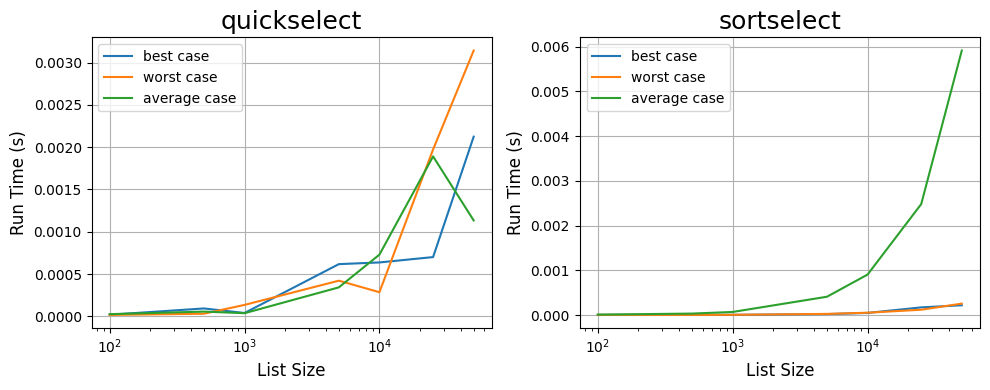

In [37]:
import matplotlib.pyplot as plt

plt.subplots(1, 2, figsize=(10, 4))
# plot by algorithm
for i, (algo, results) in enumerate(benchmark_results.items()):
    plt.subplot(1, 2, i + 1)
    plt.grid(True)
    plt.xscale("log")
    plt.xlabel("List Size", fontsize=12)
    plt.ylabel("Run Time (s)", fontsize=12)
    plt.title(f"{algo.__name__}", fontsize=18)
    for case, times in results.items():
        plt.plot(list_sizes, times, label=f"{case} case")
    plt.legend()
plt.tight_layout()

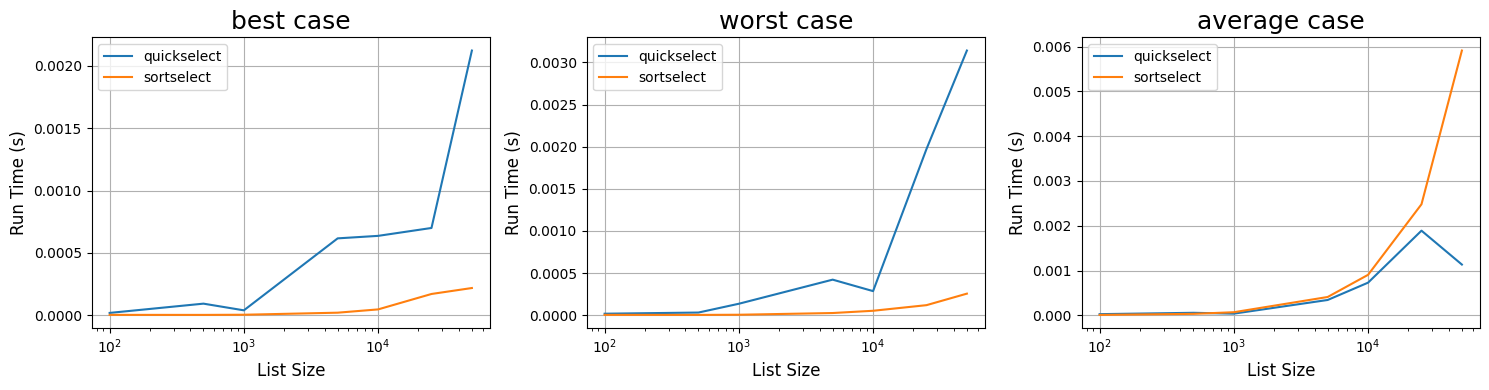

In [38]:

plt.subplots(1, 3, figsize=(15, 4))
# plot by case
for i, (algo, results) in enumerate(benchmark_results.items()):
    for j, (case, times) in enumerate(results.items()):
        plt.subplot(1, 3, j + 1)
        plt.grid(True)
        plt.xscale("log")
        # plt.yscale("log")
        plt.xlabel("List Size", fontsize=12)
        plt.ylabel("Run Time (s)", fontsize=12)
        plt.title(f"{case} case", fontsize=18)
        plt.plot(list_sizes, times, label=f"{algo.__name__}")
        plt.legend()
plt.tight_layout()